import

In [10]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns


Load and Preprocess the Data

For this demonstration, we'll use the Iris dataset again, which contains three classes of flowers based on four features.

In [11]:
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Define a Model

We'll demonstrate cross-validation with different classification models, such as Logistic Regression, Random Forest Classifier, and Support Vector Classifier (SVC).

In [12]:
log_reg = LogisticRegression(max_iter=200)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
svc = SVC()

models = [log_reg, random_forest, svc]
model_names = ['Logistic Regression', 'Random Forest', 'SVC']


Cross-validation with Different Models

Now let's apply k-fold cross-validation to evaluate the performance of these models. We will use 5-fold cross-validation by default.

In this example:

cross_val_score performs k-fold cross-validation with cv=5, meaning the dataset will be split into 5 subsets, and the model will be trained 5 times, each time with a different subset as the test set and the rest as the training set.

The scoring='accuracy' parameter tells Scikit-learn to use accuracy as the evaluation metric.

In [13]:
# cross-validation and store results
cv_results = {}

for model, name in zip(models, model_names):
    # Perform cross-validation
    cv_score = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    cv_results[name] = cv_score
    print(f"{name}: Mean Accuracy: {cv_score.mean():.4f}, Standard Deviation: {cv_score.std():.4f}")


Logistic Regression: Mean Accuracy: 0.9733, Standard Deviation: 0.0249
Random Forest: Mean Accuracy: 0.9667, Standard Deviation: 0.0211
SVC: Mean Accuracy: 0.9667, Standard Deviation: 0.0211


Visualize the Cross-validation Results

You can visualize the cross-validation results for each model to better compare their performance:

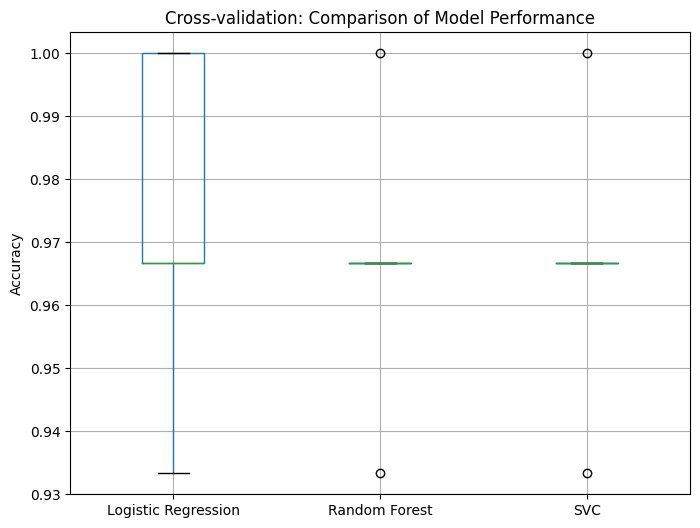

In [14]:
cv_df = pd.DataFrame(cv_results)

plt.figure(figsize=(8, 6))
cv_df.boxplot()
plt.title("Cross-validation: Comparison of Model Performance")
plt.ylabel("Accuracy")
plt.show()


Interpreting Cross-Validation Results

From the boxplot, you can compare the performance of the models based on their:

Mean Accuracy: The average accuracy score across all folds.

Standard Deviation: A measure of variability in the accuracy scores across the different folds. Lower variability means the model's performance is more stable.

Stratified K-Fold Cross-validation (Optional)

In case of imbalanced classes, you may want to use Stratified K-Fold Cross-validation, which ensures that each fold has the same proportion of classes as the entire dataset.

In [15]:
from sklearn.model_selection import StratifiedKFold

# Stratified K-Fold cross-validation
stratified_kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# cross-validation for each model
stratified_cv_results = {}
for model, name in zip(models, model_names):
    stratified_cv_score = cross_val_score(model, X, y, cv=stratified_kf, scoring='accuracy')
    stratified_cv_results[name] = stratified_cv_score
    print(f"{name} (Stratified): Mean Accuracy: {stratified_cv_score.mean():.4f}, Standard Deviation: {stratified_cv_score.std():.4f}")


Logistic Regression (Stratified): Mean Accuracy: 0.9667, Standard Deviation: 0.0298
Random Forest (Stratified): Mean Accuracy: 0.9467, Standard Deviation: 0.0267
SVC (Stratified): Mean Accuracy: 0.9667, Standard Deviation: 0.0298


Additional Cross-validation Methods

Leave-One-Out Cross-Validation (LOO-CV): In Leave-One-Out cross-validation, one sample is used as the test set, and the rest are used for training. This is computationally expensive but may be useful for small datasets.

Repeated Cross-Validation: You can repeat the cross-validation multiple times with different splits to get a more robust estimate of performance.

In [16]:
from sklearn.model_selection import RepeatedKFold

# Repeated cross-validation
repeated_kf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=42)

for model, name in zip(models, model_names):
    repeated_cv_score = cross_val_score(model, X, y, cv=repeated_kf, scoring='accuracy')
    print(f"{name} (Repeated): Mean Accuracy: {repeated_cv_score.mean():.4f}, Standard Deviation: {repeated_cv_score.std():.4f}")


Logistic Regression (Repeated): Mean Accuracy: 0.9689, Standard Deviation: 0.0310
Random Forest (Repeated): Mean Accuracy: 0.9556, Standard Deviation: 0.0416
SVC (Repeated): Mean Accuracy: 0.9644, Standard Deviation: 0.0394


Cross-validation helps in assessing the generalization ability of a model and provides a more reliable evaluation metric compared to a single train-test split.

5-fold cross-validation is the most common approach, but it can be adjusted to suit different needs (e.g., stratified folds for imbalanced datasets or repeated cross-validation for more robust performance estimates).

Model comparison using cross-validation allows you to select the best model based on performance metrics such as accuracy, precision, recall, or F1-score.